<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [3]:
# loading the data:
customers = pd.read_csv('../data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

Diccionario de las variables:
1)	FRESH: annual spending (m.u.) on fresh products (Continuous);
2)	MILK: annual spending (m.u.) on milk products (Continuous);
3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);
4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)
5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

In [4]:
# Your code here:
customers.columns   # se observan las columnas

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

**Your observations here**

+ 'channel' y 'region' sí que son variables categóricas y se podrían pasar a dummies aunque no sepamos su nombre (ya que están clasificadas por números).
+ No hay ningún valor nulo.
+ Se puede ver una alta correlación entre las variables 'detergents_paper' y 'grocery', de momento no voy a eliminar una de ellas porque aún no sé lo que vamos a seguir realizando en el laboratorio, ni si alguna de las dos va a ser la variable dependiente de un modelo.
+ En el boxplot podemos ver que tienen outliers casi todas las columnas excepto 'channel' y 'region' ya que son categóricas.
+ Ninguna de las variables sigue una distribución normal, con lo cual en un futuro, habrá que normalizarlas.



In [17]:
customers.columns=customers.columns.str.lower()

In [18]:
customers.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [19]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   channel           440 non-null    int64
 1   region            440 non-null    int64
 2   fresh             440 non-null    int64
 3   milk              440 non-null    int64
 4   grocery           440 non-null    int64
 5   frozen            440 non-null    int64
 6   detergents_paper  440 non-null    int64
 7   delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [20]:
customers.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
detergents_paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


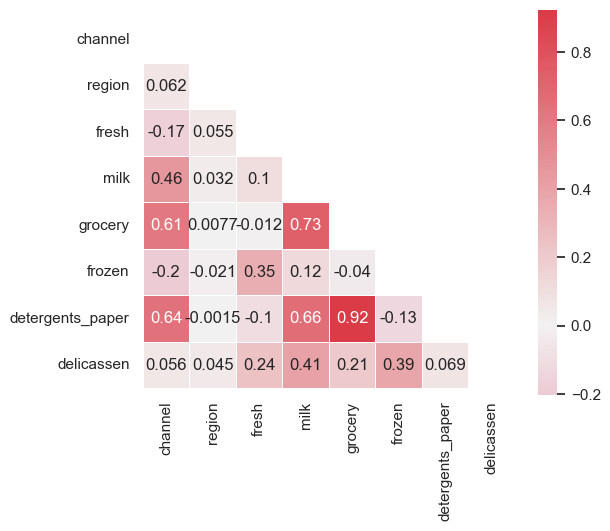

In [21]:
plt.figure(figsize=(6, 10))   

sns.set(style='white')   

mask=np.triu(np.ones_like(customers.corr(), dtype=bool))    

cmap=sns.diverging_palette(0, 10, as_cmap=True)   


sns.heatmap(customers.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

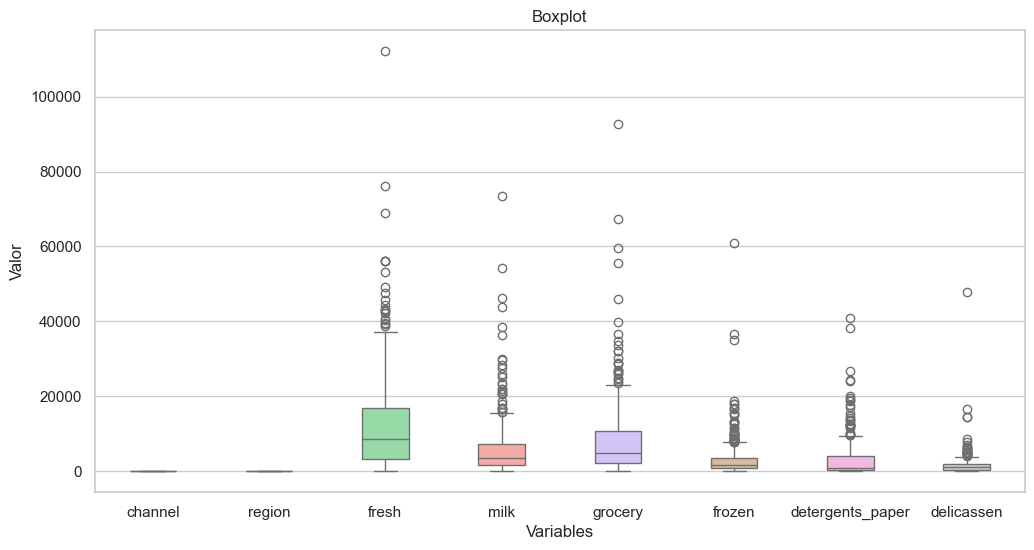

In [24]:
sns.set(style="whitegrid")  # Establecer el estilo del fondo
plt.figure(figsize=(12, 6))  # Establecer el tamaño del gráfico

# Crear el boxplot
sns.boxplot(customers, palette='pastel', width=0.4)

# Añadir etiquetas y título
plt.xlabel('Variables')
plt.ylabel('Valor')
plt.title('Boxplot')

# Mostrar el gráfico
plt.show()

In [33]:
from scipy.stats import shapiro


for columna in customers.columns:
    stat, p_valor = shapiro(customers[columna])
    print(' ')
    print(columna)
    # Tomar una decisión basada en el p-valor
    nivel_de_significatividad = 0.05
    if p_valor > nivel_de_significatividad:
        print(f'P-valor: {p_valor}. No podemos rechazar la hipótesis nula. Los datos parecen seguir una distribución normal.')
    else:
        print(f'P-valor: {p_valor}. Rechazamos la hipótesis nula. Los datos no parecen seguir una distribución normal.')


 
channel
P-valor: 6.237821428146971e-31. Rechazamos la hipótesis nula. Los datos no parecen seguir una distribución normal.
 
region
P-valor: 7.898492608711832e-31. Rechazamos la hipótesis nula. Los datos no parecen seguir una distribución normal.
 
fresh
P-valor: 7.91843824961924e-24. Rechazamos la hipótesis nula. Los datos no parecen seguir una distribución normal.
 
milk
P-valor: 9.762061919511109e-30. Rechazamos la hipótesis nula. Los datos no parecen seguir una distribución normal.
 
grocery
P-valor: 3.906127057558714e-28. Rechazamos la hipótesis nula. Los datos no parecen seguir una distribución normal.
 
frozen
P-valor: 1.2913321191929252e-32. Rechazamos la hipótesis nula. Los datos no parecen seguir una distribución normal.
 
detergents_paper
P-valor: 1.9145929126306173e-30. Rechazamos la hipótesis nula. Los datos no parecen seguir una distribución normal.
 
delicassen
P-valor: 1.7534077741301854e-36. Rechazamos la hipótesis nula. Los datos no parecen seguir una distribución n

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

**Your comment here**

+ Después de haber mirado el df no considero que haya que hacer ninguna limpieza ni transformación de momento. Hay algunos outliers pero como el df es bastante pequeño no los voy a eliminar.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [34]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Suponiendo que tienes un DataFrame llamado customers
# Selecciona solo las columnas que deseas escalar (aquí asumimos que queremos escalar todas las columnas)
columnas_a_escalar = customers.columns
datos_a_escalar = customers[columnas_a_escalar]

# Inicializa el StandardScaler
scaler = StandardScaler()

# Ajusta el scaler y transforma los datos
customers_scale = scaler.fit_transform(datos_a_escalar)

# customers_scale es ahora un array numpy con los datos escalados
# Puedes convertirlo de nuevo a un DataFrame si es necesario
customers_scale = pd.DataFrame(customers_scale, columns=columnas_a_escalar)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [36]:
from sklearn.cluster import KMeans

# Your code here:

# Inicializa el modelo K-Means con el número deseado de clusters (vamos a usar 3 como ejemplo)
numero_de_clusters = 3
modelo_kmeans = KMeans(n_clusters=numero_de_clusters, random_state=42)

# Ajusta el modelo a los datos escalados y obtén las etiquetas de clúster
etiquetas_kmeans = modelo_kmeans.fit_predict(customers_scale)

# Asigna las etiquetas de clúster de vuelta al DataFrame original
customers['labels'] = etiquetas_kmeans



c:\Users\Lidiavf1912\anaconda3\envs\entorno_clase\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Count the values in `labels`.

In [39]:
# Your code here:
conteo_etiquetas = customers['labels'].value_counts()

print(conteo_etiquetas)


labels
1    297
0    130
2     13
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [40]:
# Your code here
from sklearn.cluster import DBSCAN 

# Inicializa el modelo DBSCAN con el parámetro eps (vamos a usar 0.5 como ejemplo)
modelo_dbscan = DBSCAN(eps=0.5)

# Ajusta el modelo a los datos escalados y obtén las etiquetas de clúster
etiquetas_dbscan = modelo_dbscan.fit_predict(customers_scale)

# Asigna las etiquetas de clúster de vuelta al DataFrame original
customers['labels_DBSCAN'] = etiquetas_dbscan


Count the values in `labels_DBSCAN`.

In [41]:
# Your code here
conteo_etiquetas_dbscan = customers['labels_DBSCAN'].value_counts()

print(conteo_etiquetas_dbscan)


labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

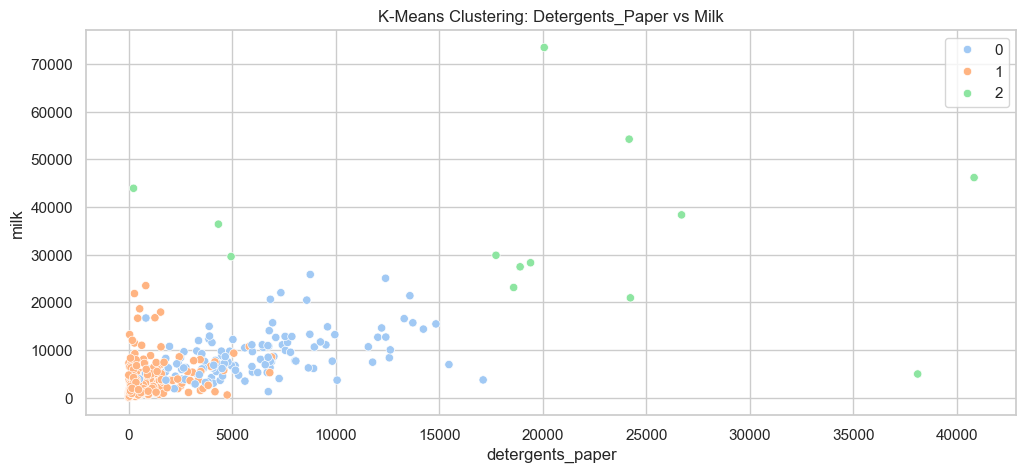

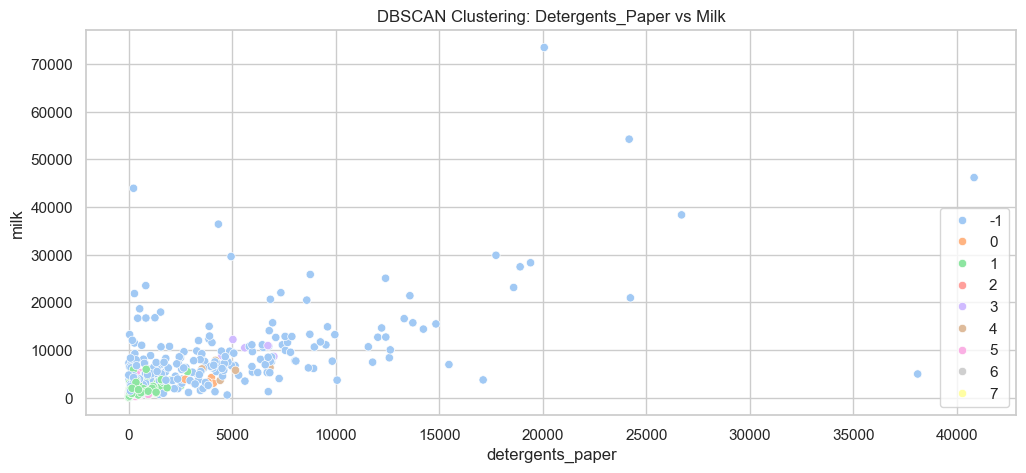

In [43]:
# Gráfico para K-Means
plt.figure(figsize=(12, 5))
sns.scatterplot(x='detergents_paper', y='milk', hue='labels', data=customers, palette='pastel')
plt.title('K-Means Clustering: Detergents_Paper vs Milk')
plt.xlabel('detergents_paper')
plt.ylabel('milk')
plt.legend()
plt.show()

# Gráfico para DBSCAN
plt.figure(figsize=(12, 5))
sns.scatterplot(x='detergents_paper', y='milk', hue='labels_DBSCAN', data=customers, palette='pastel')
plt.title('DBSCAN Clustering: Detergents_Paper vs Milk')
plt.xlabel('detergents_paper')
plt.ylabel('milk')
plt.legend()
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

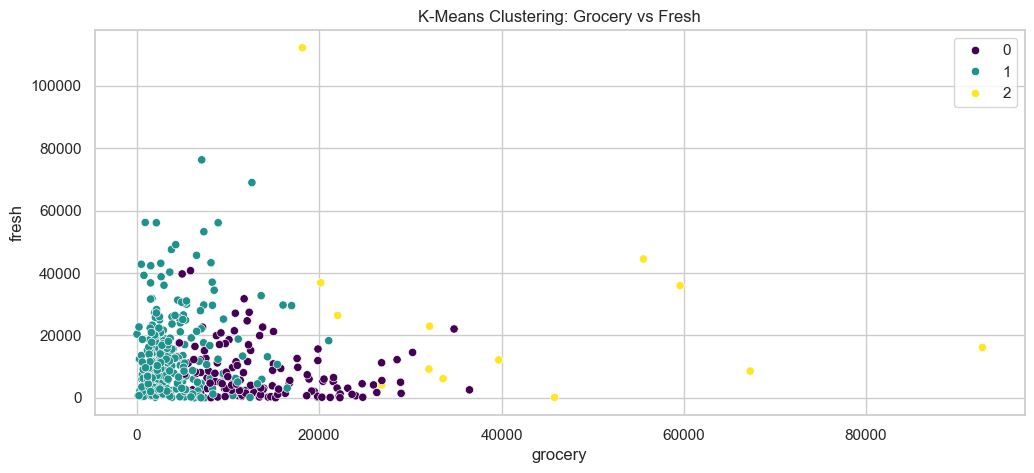

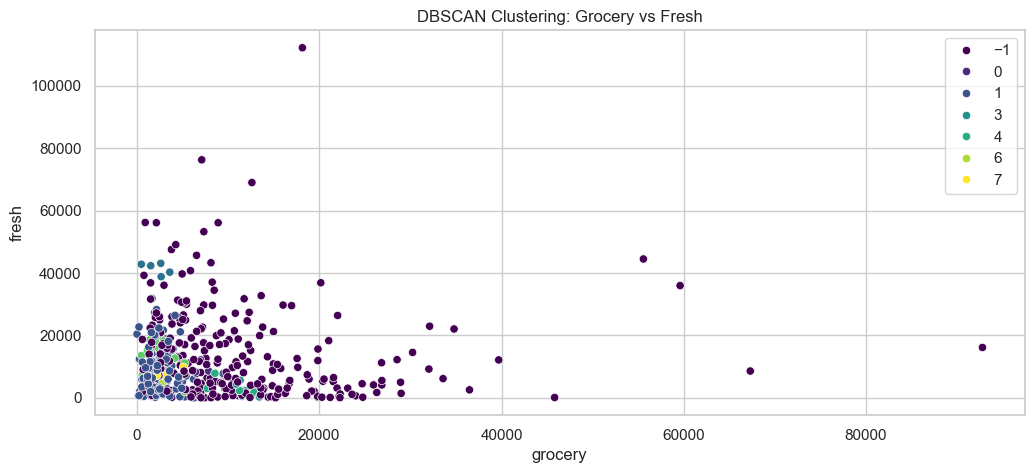

In [44]:
# Your code here:
# Gráfico para K-Means
plt.figure(figsize=(12, 5))
sns.scatterplot(x='grocery', y='fresh', hue='labels', data=customers, palette='viridis')
plt.title('K-Means Clustering: Grocery vs Fresh')
plt.xlabel('grocery')
plt.ylabel('fresh')
plt.legend()
plt.show()

# Gráfico para DBSCAN
plt.figure(figsize=(12, 5))
sns.scatterplot(x='grocery', y='fresh', hue='labels_DBSCAN', data=customers, palette='viridis')
plt.title('DBSCAN Clustering: Grocery vs Fresh')
plt.xlabel('grocery')
plt.ylabel('fresh')
plt.legend()
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

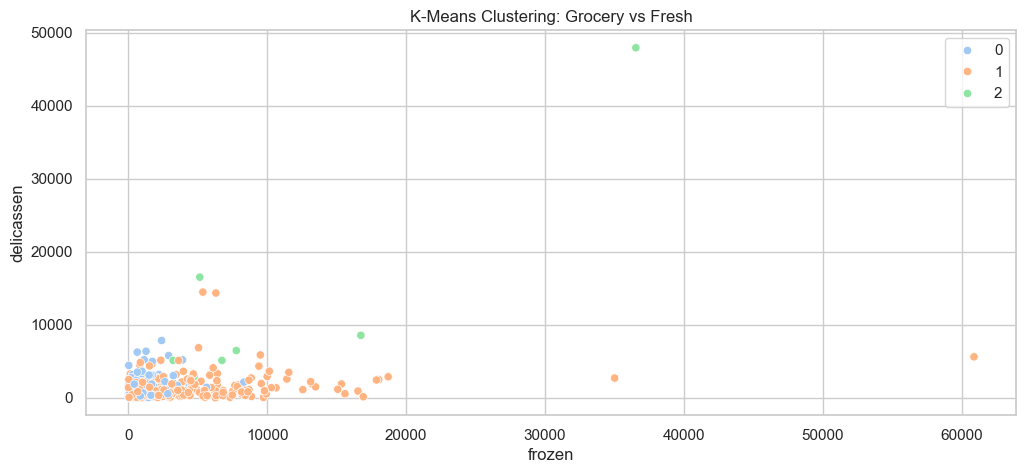

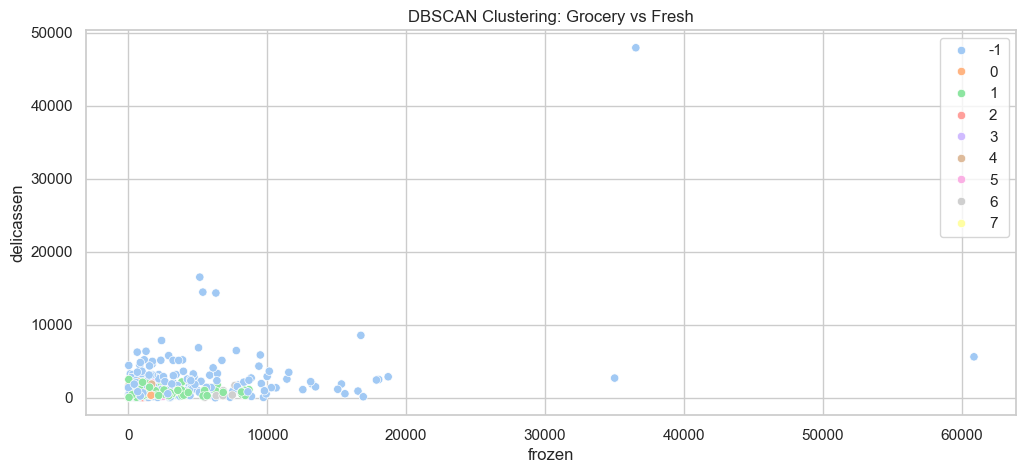

In [47]:
# Your code here:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico para K-Means
plt.figure(figsize=(12, 5))
sns.scatterplot(x='frozen', y='delicassen', hue='labels', data=customers, palette='pastel')
plt.title('K-Means Clustering: Grocery vs Fresh')
plt.xlabel('frozen')
plt.ylabel('delicassen')
plt.legend()
plt.show()

# Gráfico para DBSCAN
plt.figure(figsize=(12, 5))
sns.scatterplot(x='frozen', y='delicassen', hue='labels_DBSCAN', data=customers, palette='pastel')
plt.title('DBSCAN Clustering: Grocery vs Fresh')
plt.xlabel('frozen')
plt.ylabel('delicassen')
plt.legend()
plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [49]:
# Your code here:
# Supongamos que tienes un DataFrame llamado customers con las columnas 'labels' y 'labels_DBSCAN'
# También supongamos que deseas calcular las medias para todas las columnas

# Medias para K-Means
medias_kmeans = customers.groupby('labels').mean()
print(medias_kmeans)
# Medias para DBSCAN
medias_dbscan = customers.groupby('labels_DBSCAN').mean()
print(medias_dbscan)


         channel    region         fresh          milk       grocery  \
labels                                                                 
0       2.000000  2.623077   8165.915385   8748.515385  13905.492308   
1       1.003367  2.505051  13075.898990   3218.737374   3855.696970   
2       1.846154  2.615385  25770.769231  35160.384615  41977.384615   

             frozen  detergents_paper   delicassen  labels_DBSCAN  
labels                                                             
0       1441.630769       5991.146154  1535.007692      -0.538462  
1       3620.400673        776.875421  1242.249158       0.646465  
2       6844.538462      19867.384615  7880.307692      -1.000000  
                channel   region         fresh          milk       grocery  \
labels_DBSCAN                                                                
-1             1.490196  2.45098  13729.564706   8359.886275  11484.364706   
 0             2.000000  3.00000  11401.000000   3536.200000   67

Which algorithm appears to perform better?

**Your observations here**

 Me cuesta un poco ver cual de los dos modelos clusteriza mejor a traves de sus medias. Si fuera por los graficos diria que kmeans funciona mejor, aunque si fuera por la diferencia de medias podria ser DBSCAN. Para mi ninguno de los dos esta haciendo buenos clusters.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

**Your comment here**

Segun puedo ver, 2 clusters parecen funcionar mejor.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

+ 
+ 
+ 
